In [3]:
import pandas as pd

# Load the CSV file containing S&P 500 data
data = pd.read_csv("S&P 500 data.csv")  # Replace 'your_file_name.csv' with your actual CSV file path

# Preview the first few rows of the data
print(data.head())

         Date      Open      High       Low     Close
0  11/01/2024  5,723.22  5,772.52  5,723.22  5,728.80
1  10/31/2024  5,775.34  5,775.34  5,702.86  5,705.45
2  10/30/2024  5,832.65  5,850.94  5,811.28  5,813.67
3  10/29/2024  5,819.68  5,847.19  5,802.17  5,832.92
4  10/28/2024  5,833.93  5,842.92  5,823.08  5,823.52


In [4]:
# Check the structure of the dataset (data types, missing values, etc.)
print(data.info())

# Check for missing values in each column
print(data.isnull().sum())

# Check for duplicates in the dataset
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    24 non-null     object
 1   Open    24 non-null     object
 2   High    24 non-null     object
 3   Low     24 non-null     object
 4   Close   24 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB
None
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64
0


In [5]:
# Fill missing values with forward fill (using previous valid value)
data.fillna(method='ffill', inplace=True)

# Drop duplicates (if any)
data = data.drop_duplicates()

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)  # Set 'Date' as the index of the DataFrame

# Verify changes
print(data.head())

                Open      High       Low     Close
Date                                              
2024-11-01  5,723.22  5,772.52  5,723.22  5,728.80
2024-10-31  5,775.34  5,775.34  5,702.86  5,705.45
2024-10-30  5,832.65  5,850.94  5,811.28  5,813.67
2024-10-29  5,819.68  5,847.19  5,802.17  5,832.92
2024-10-28  5,833.93  5,842.92  5,823.08  5,823.52


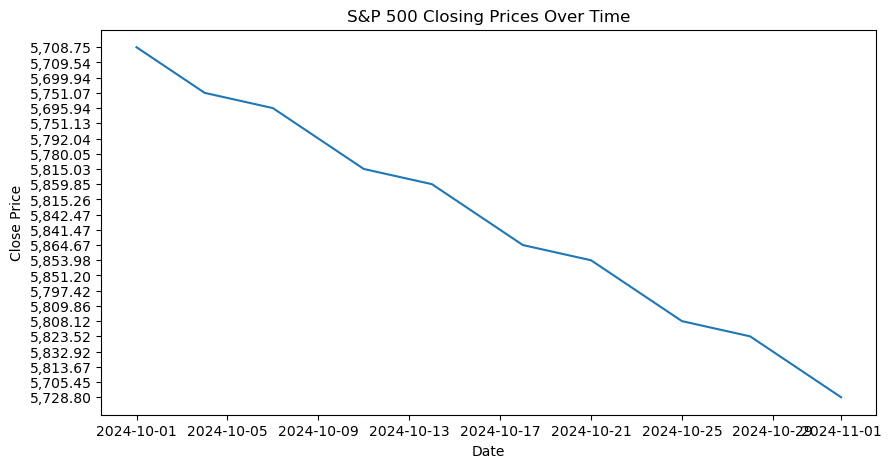

            Open      High       Low     Close
count         24        24        24        24
unique        24        24        24        24
top     5,723.22  5,772.52  5,723.22  5,728.80
freq           1         1         1         1


In [6]:
import matplotlib.pyplot as plt

# Plot the S&P 500 closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(data['Close'])
plt.title("S&P 500 Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# Calculate basic statistics for the dataset
print(data.describe())

In [8]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Example: Cleaning the 'Close' column
data['Close'] = data['Close'].str.replace(',', '').astype(float)

# Perform the ADF test on the cleaned 'Close' column
result = adfuller(data['Close'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -2.3207161016103384
p-value: 0.16537363418019274


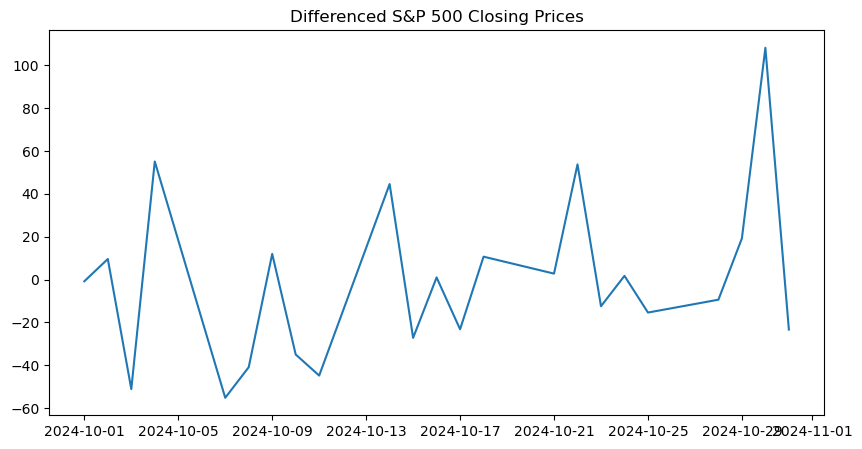

In [9]:
# Apply first-order differencing to the 'Close' column
data['Close_diff'] = data['Close'].diff().dropna()

# Plot the differenced data to check for stationarity
plt.figure(figsize=(10, 5))
plt.plot(data['Close_diff'])
plt.title("Differenced S&P 500 Closing Prices")
plt.show()

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (using (1, 1, 1) as example for p, d, q)
model = ARIMA(data['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Output the summary of the ARIMA model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -115.614
Date:                Sun, 24 Nov 2024   AIC                            237.227
Time:                        19:28:13   BIC                            240.634
Sample:                             0   HQIC                           238.084
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2513      1.464     -0.172      0.864      -3.121       2.618
ma.L1          0.0134      1.568      0.009      0.993      -3.061       3.087
sigma2      1360.5136    354.353      3.839      0.0

C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packa

C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


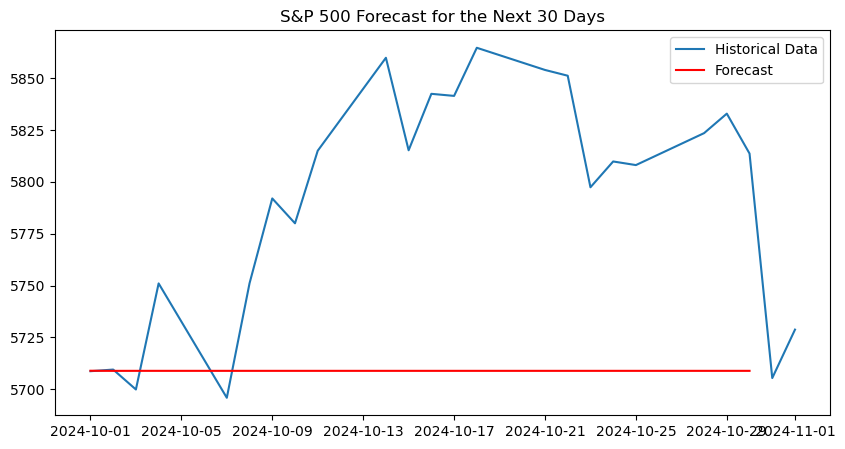

In [11]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the historical and forecasted data
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.title("S&P 500 Forecast for the Next 30 Days")
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Example actual and predicted values (replace these with your real data)
actual = [3.5, 2.8, 4.0, 5.1, 6.3]  # Actual values
predicted = [3.6, 2.7, 3.9, 5.0, 6.5]  # Predicted values

# Calculate metrics
mae = mean_absolute_error(actual, predicted)
rmse = mean_squared_error(actual, predicted, squared=False)

# Print results
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 0.11999999999999993
RMSE: 0.12649110640673514


In [15]:
# Interpolation method for filling missing values
data['Close'] = data['Close'].interpolate(method='linear')

# Backward fill method
data['Close'] = data['Close'].fillna(method='bfill')

In [16]:
# Z-score method to detect outliers (anything greater than 3 standard deviations)
from scipy import stats
z_scores = stats.zscore(data['Close'])
data = data[(z_scores < 3)]  # Keep data points with Z-scores less than 3

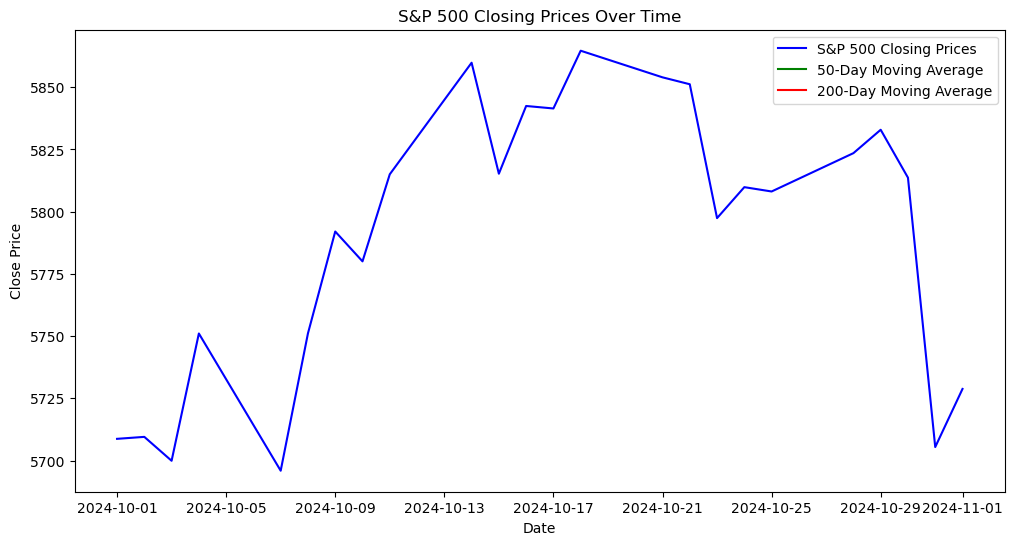

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data['Close'], label='S&P 500 Closing Prices', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('S&P 500 Closing Prices Over Time')
ax.legend()

# Plot the moving average for smoothing the trend
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

ax.plot(data['MA50'], label='50-Day Moving Average', color='green')
ax.plot(data['MA200'], label='200-Day Moving Average', color='red')

plt.legend()
plt.show()

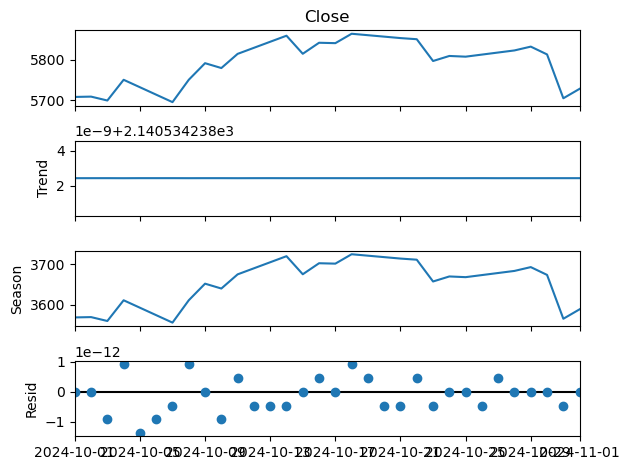

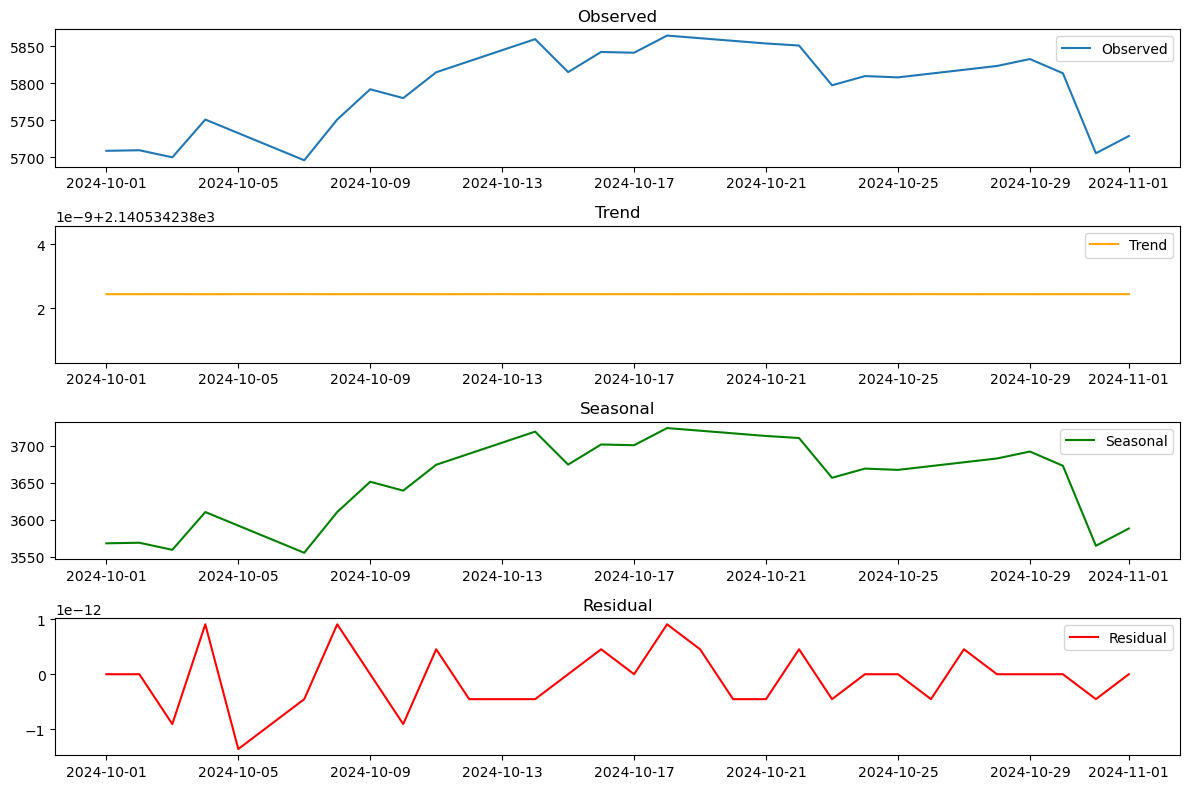

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Step 1: Load and Prepare the Data
data = pd.read_csv('S&P 500 data.csv')  # Replace with your file path

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)

# Remove commas and convert 'Close' to numeric
data['Close'] = data['Close'].str.replace(',', '').astype(float)

# Ensure the data has a daily frequency
data = data.asfreq('D')  # Set to daily frequency; adjust as needed
data['Close'] = data['Close'].interpolate()  # Fill missing values

# Step 2: Perform STL Decomposition
# Define the period (e.g., 365 for yearly data, 7 for weekly seasonality)
stl = STL(data['Close'], period=365)  # Adjust period based on your data's seasonality
result = stl.fit()

# Step 3: Plot the Decomposed Components
fig = result.plot()
plt.show()

# Step 4: Analyze the Components
# Extract components
trend = result.trend
seasonal = result.seasonal
resid = result.resid

# Plot each component
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='Observed')
plt.title('Observed')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(resid, label='Residual', color='red')
plt.title('Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
from pmdarima import auto_arima

# Automatically find the best ARIMA parameters (p, d, q)
model_auto_arima = auto_arima(data['Close'], seasonal=False, stepwise=True, trace=True)
print(model_auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=329.291, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=647.354, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=330.217, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=326.611, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=318.025, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=332.243, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=315.606, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=351.433, Time=0.02 sec
 ARIMA(2,0

C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


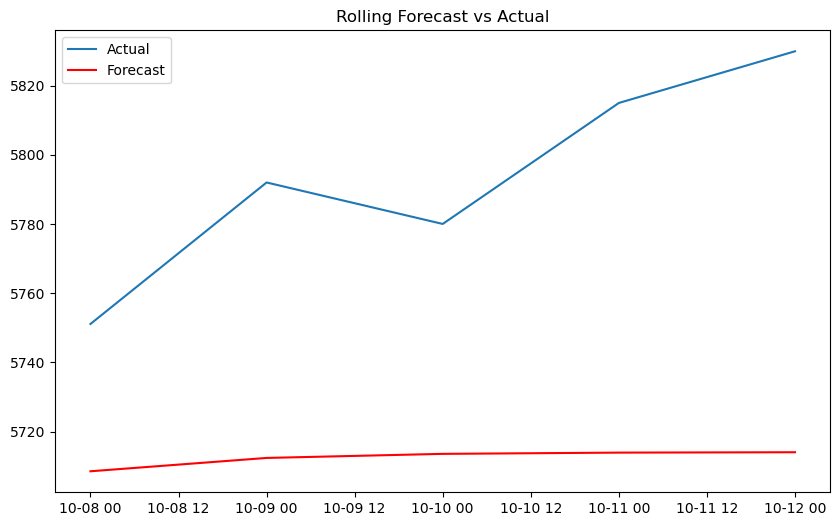

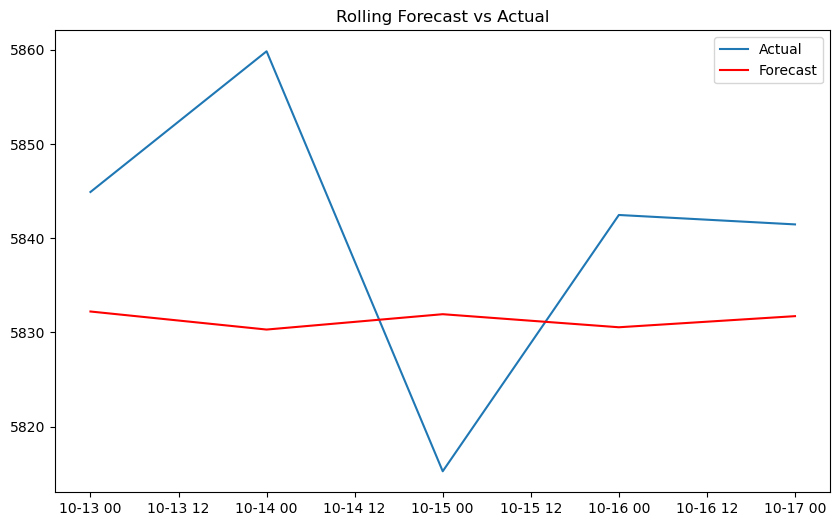

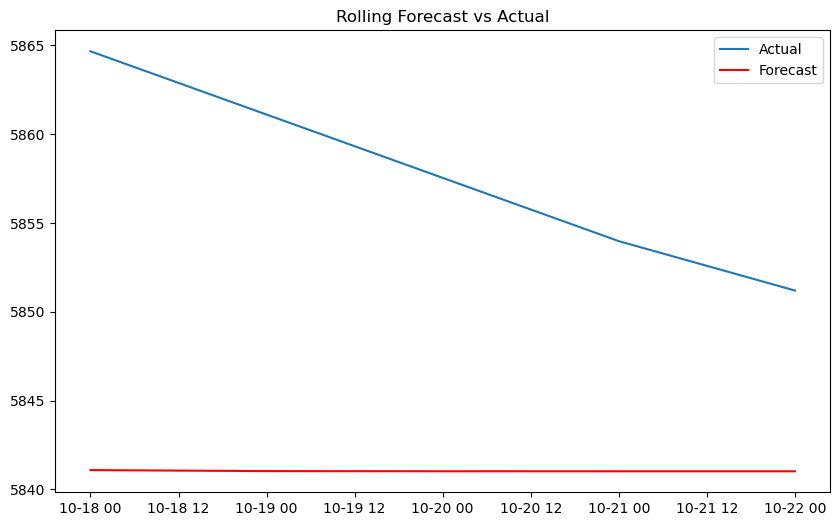

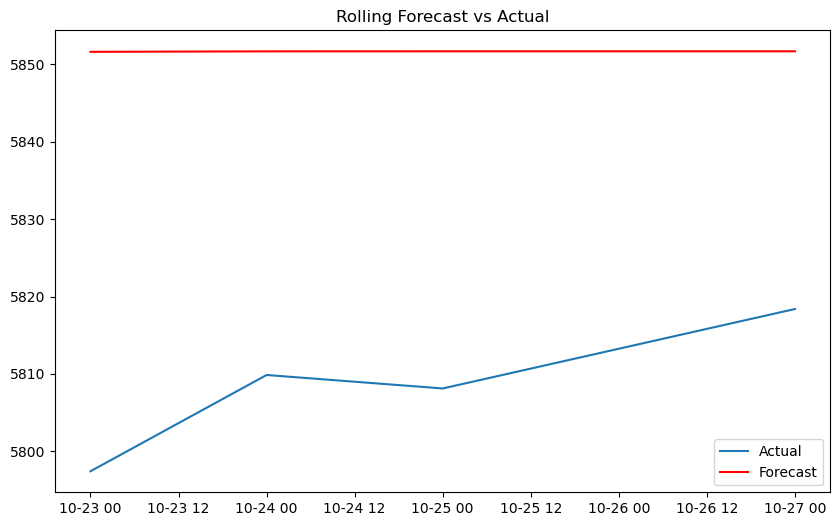

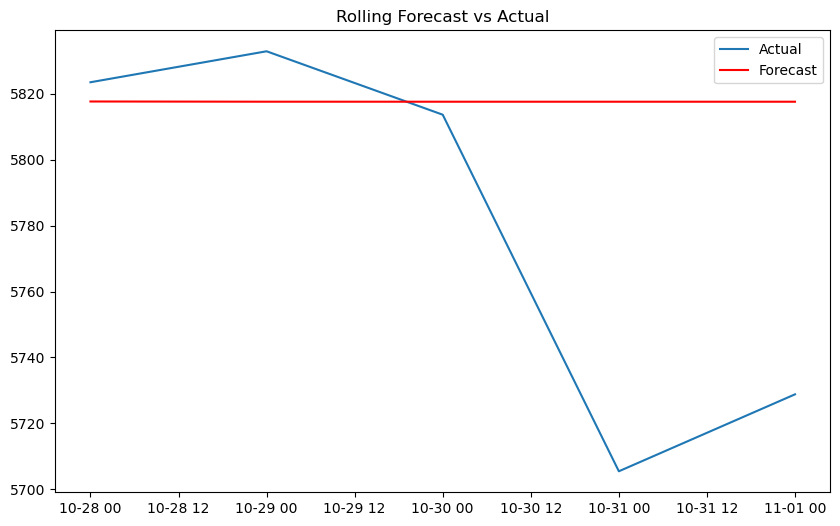

In [28]:
from sklearn.model_selection import TimeSeriesSplit

# Create a time series split (rolling forecast)
tscv = TimeSeriesSplit(n_splits=5)  # 5-fold cross-validation

for train_index, test_index in tscv.split(data['Close']):
    train, test = data['Close'][train_index], data['Close'][test_index]
    
    model = ARIMA(train, order=(1, 1, 1))  # ARIMA(1, 1, 1)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    
    # Plot forecast vs actual
    plt.figure(figsize=(10, 6))
    plt.plot(test.index, test, label='Actual')
    plt.plot(test.index, forecast, label='Forecast', color='red')
    plt.title("Rolling Forecast vs Actual")
    plt.legend()
    plt.show()

In [25]:
# MAPE Calculation
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test, forecast)
print(f'MAPE: {mape:.2f}%')

MAPE: 0.79%


C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packa

Mean Absolute Error: 65.82175000699189
Root Mean Squared Error: 69.1710247566172


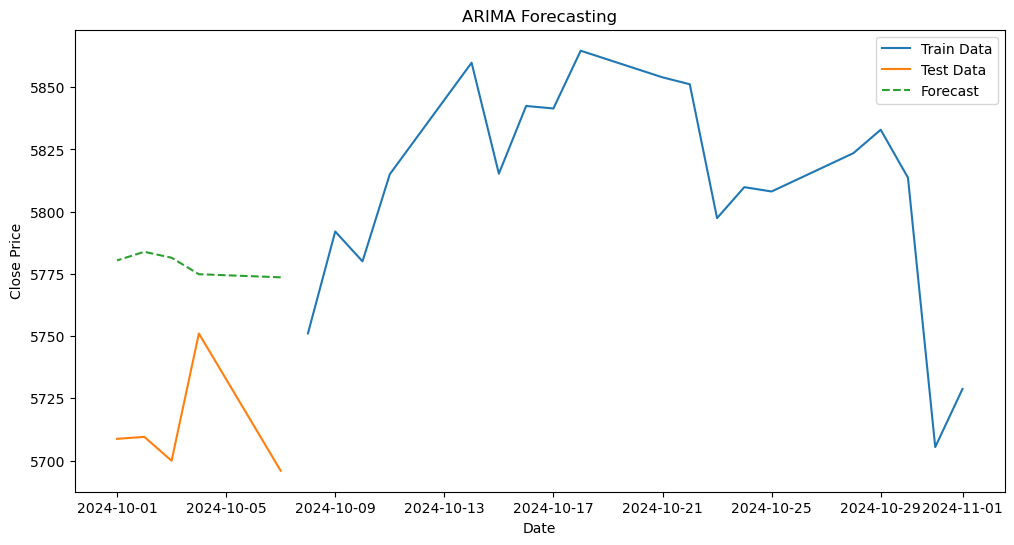

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Load and Preprocess Data
data = pd.read_csv('S&P 500 data.csv')  # Replace with your actual file path
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Clean data (assuming 'Close' is the target column)
data['Close'] = data['Close'].str.replace(',', '').astype(float)
data = data[['Close']].dropna()

# Step 2: Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Step 3: Fit the ARIMA model
model = ARIMA(train, order=(5,1,0))  # (p,d,q) values can be adjusted
model_fit = model.fit()

# Step 4: Forecast using the model
forecast = model_fit.forecast(steps=len(test))

# Step 5: Evaluate the model
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Step 6: Plot the results
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], label='Train Data')
plt.plot(test.index, test['Close'], label='Test Data')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Step 1: Load and preprocess data
data = pd.read_csv('S&P 500 data.csv')  # Replace with your actual file path
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Step 2: Clean the 'Close' column by removing commas and converting to numeric
data['Close'] = data['Close'].replace({',': ''}, regex=True)  # Remove commas
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')  # Convert to numeric, coercing any errors to NaN

# Drop rows with NaN values after conversion (if any)
data = data.dropna(subset=['Close'])

# Debugging step: Check if data has enough points
print(f"Number of data points: {len(data)}")
print(f"First few rows of the data:\n{data.head()}")

# Ensure there are enough data points for sequence generation
sequence_length = 60
if len(data) < sequence_length:
    print(f"Data is too short. You need at least {sequence_length} data points.")
else:
    # Step 3: Scaling the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['Close']])  # Make sure to scale only the 'Close' column

    # Step 4: Prepare data for LSTM (create sequences of data)
    X = []
    y = []

    # Generate sequences
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])  # Using 60 previous time steps
        y.append(scaled_data[i, 0])      # The next time step is the target

    # Convert lists to numpy arrays
    X, y = np.array(X), np.array(y)

    # Debugging step: Check the shape of X and y before reshaping
    print(f"Shape of X before reshaping: {X.shape}")
    print(f"Shape of y: {y.shape}")

    # Ensure that X has the correct 2D shape (samples, time_steps) before reshaping
    if X.ndim == 2 and X.shape[1] == sequence_length:
        # Reshape X to be 3D (samples, time_steps, features) for LSTM
        X = X.reshape((X.shape[0], X.shape[1], 1))  # 3D: (samples, time_steps, features)

        # Debugging step: Check the shape after reshaping
        print(f"Shape of X after reshaping: {X.shape}")
    else:
        print(f"Error: X does not have the expected shape (samples, time_steps). Current shape: {X.shape}")

    # Step 5: Split data into training and testing sets (80-20 split)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Step 6: Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))  # Adjust input shape
    model.add(Dense(units=1))  # Output layer with 1 neuron (predicting a single value)
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Step 7: Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

    # Step 8: Make predictions
    predicted_y = model.predict(X_test)

    # Step 9: Inverse scaling for predictions and actual values
    predicted_y = scaler.inverse_transform(predicted_y)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Step 10: Evaluate the model
    mae = mean_absolute_error(y_test, predicted_y)
    rmse = np.sqrt(mean_squared_error(y_test, predicted_y))

    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")

    # Step 11: Plot results
    plt.figure(figsize=(12,6))
    plt.plot(data.index[-len(y_test):], y_test, label='True Values')
    plt.plot(data.index[-len(y_test):], predicted_y, label='Predicted Values', linestyle='--')
    plt.title('LSTM Model Prediction vs True Values')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

Number of data points: 24
First few rows of the data:
                Open      High       Low    Close
Date                                             
2024-11-01  5,723.22  5,772.52  5,723.22  5728.80
2024-10-31  5,775.34  5,775.34  5,702.86  5705.45
2024-10-30  5,832.65  5,850.94  5,811.28  5813.67
2024-10-29  5,819.68  5,847.19  5,802.17  5832.92
2024-10-28  5,833.93  5,842.92  5,823.08  5823.52
Data is too short. You need at least 60 data points.


In [15]:
from flask import Flask
import os

# Create a Flask app instance
app = Flask(__name__)

# Define a simple route
@app.route('/')
def home():
    return "Hello, Flask!"

# Function to run the Flask app with error handling and port customization
def run_flask_app():
    try:
        # Set the environment variable for Flask debug mode
        os.environ["FLASK_DEBUG"] = "1"  # 1 enables debug mode, 0 disables it
        
        # Run the app on port 5001 or any other available port
        app.run(debug=True, port=5001)  # You can change the port if needed
    except SystemExit as e:
        print(f"Flask app exited with code: {e.code}")
    except Exception as e:
        print(f"An error occurred while starting the Flask app: {str(e)}")

# Ensure the script runs the app when executed directly
if __name__ == '__main__':
    run_flask_app()

 * Serving Flask app '__main__'
 * Debug mode: on


'FLASK_ENV' is deprecated and will not be used in Flask 2.3. Use 'FLASK_DEBUG' instead.
'FLASK_ENV' is deprecated and will not be used in Flask 2.3. Use 'FLASK_DEBUG' instead.
 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


Flask app exited with code: 1


In [4]:
import pandas as pd

# Replace with the correct path to your CSV file
file_path = "S&P 500 data.csv"

# Load the dataset
combined_data = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format and set it as the index
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.set_index('Date', inplace=True)

# Preview the dataset to verify loading
print(combined_data.head())

                Open      High       Low     Close
Date                                              
2024-11-01  5,723.22  5,772.52  5,723.22  5,728.80
2024-10-31  5,775.34  5,775.34  5,702.86  5,705.45
2024-10-30  5,832.65  5,850.94  5,811.28  5,813.67
2024-10-29  5,819.68  5,847.19  5,802.17  5,832.92
2024-10-28  5,833.93  5,842.92  5,823.08  5,823.52


In [5]:
print(combined_data.columns)  # List all column names
print(combined_data['Close'].head())  # Check the first few rows of the 'Close' column

Index(['Open', 'High', 'Low', 'Close'], dtype='object')
Date
2024-11-01    5,728.80
2024-10-31    5,705.45
2024-10-30    5,813.67
2024-10-29    5,832.92
2024-10-28    5,823.52
Name: Close, dtype: object


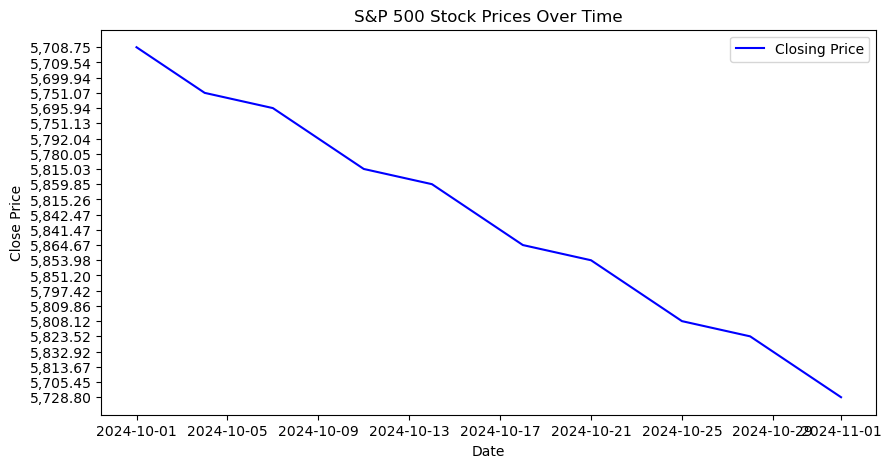

In [7]:
import matplotlib.pyplot as plt

# Line chart for historical stock prices
plt.figure(figsize=(10, 5))
plt.plot(combined_data['Close'], label='Closing Price', color='blue')
plt.title('S&P 500 Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [9]:
# Remove commas and convert to numeric
combined_data['Close'] = combined_data['Close'].replace(',', '', regex=True)
combined_data['Close'] = pd.to_numeric(combined_data['Close'], errors='coerce')
# Forward-fill or backward-fill missing values
combined_data['Close'].fillna(method='ffill', inplace=True)
combined_data['Close'].fillna(method='bfill', inplace=True)

# Alternatively, drop rows with NaN in the 'Close' column
# combined_data.dropna(subset=['Close'], inplace=True)

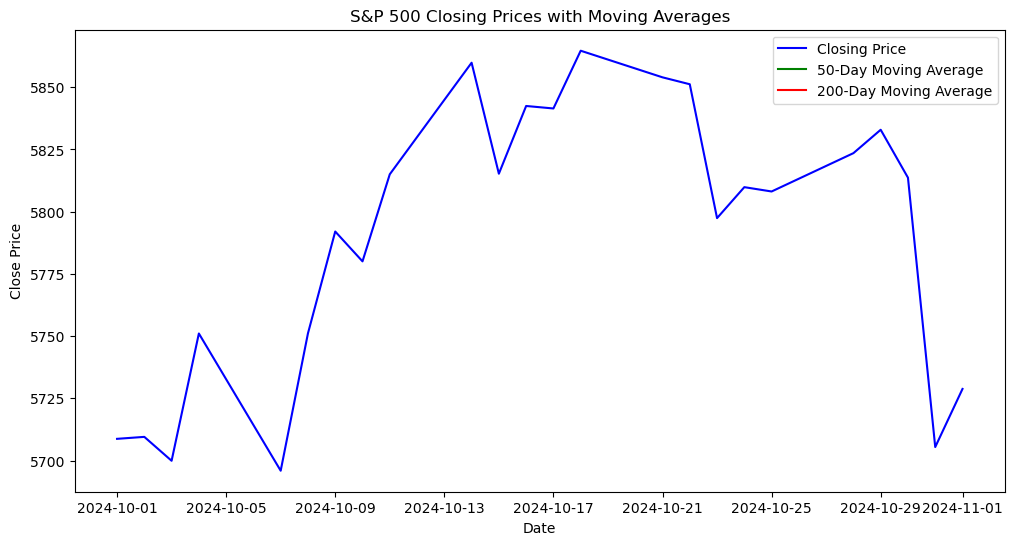

In [10]:
# Calculate moving averages
combined_data['MA50'] = combined_data['Close'].rolling(window=50).mean()
combined_data['MA200'] = combined_data['Close'].rolling(window=200).mean()

# Plot closing prices with moving averages
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(combined_data['Close'], label='Closing Price', color='blue')
plt.plot(combined_data['MA50'], label='50-Day Moving Average', color='green')
plt.plot(combined_data['MA200'], label='200-Day Moving Average', color='red')
plt.title('S&P 500 Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

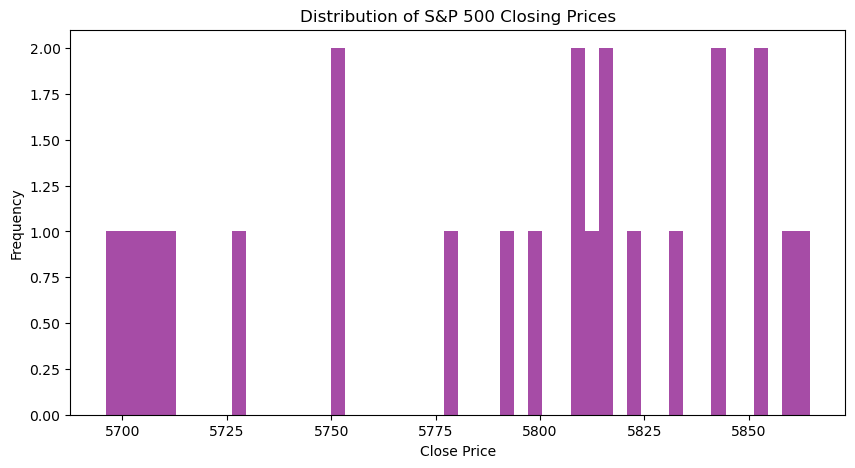

In [11]:
# Plot a histogram of closing prices
plt.figure(figsize=(10, 5))
plt.hist(combined_data['Close'], bins=50, color='purple', alpha=0.7)
plt.title('Distribution of S&P 500 Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_27160\3916966279.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()       # Adjust layout


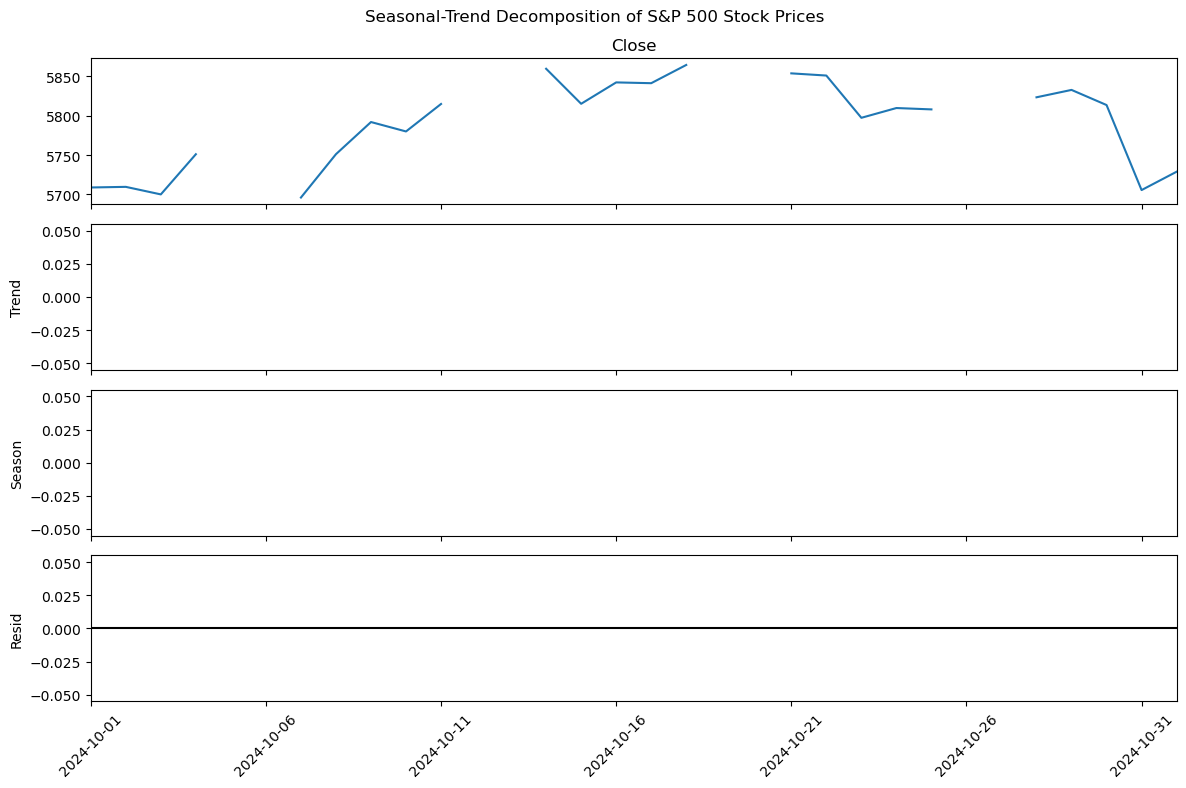

In [15]:
import matplotlib.dates as mdates

# Plot the decomposition
fig = result.plot()
fig.set_size_inches(12, 8)  # Increase figure size
plt.suptitle('Seasonal-Trend Decomposition of S&P 500 Stock Prices')

# Reduce the number of x-axis ticks and format dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Show every 5th day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates

plt.xticks(rotation=45)  # Rotate labels
plt.tight_layout()       # Adjust layout
plt.show()

ValueError: could not broadcast input array from shape (24,) into shape (41,)

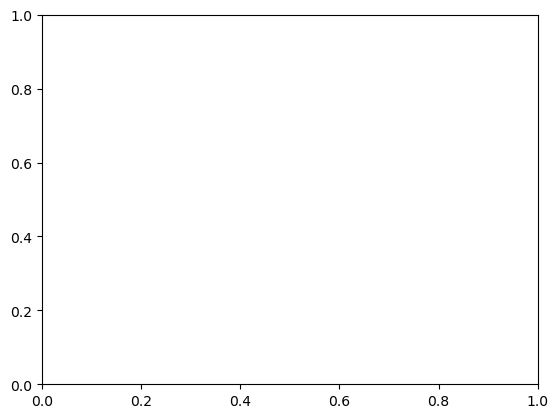

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(combined_data['Close'].dropna(), lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(combined_data['Close'].dropna(), lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


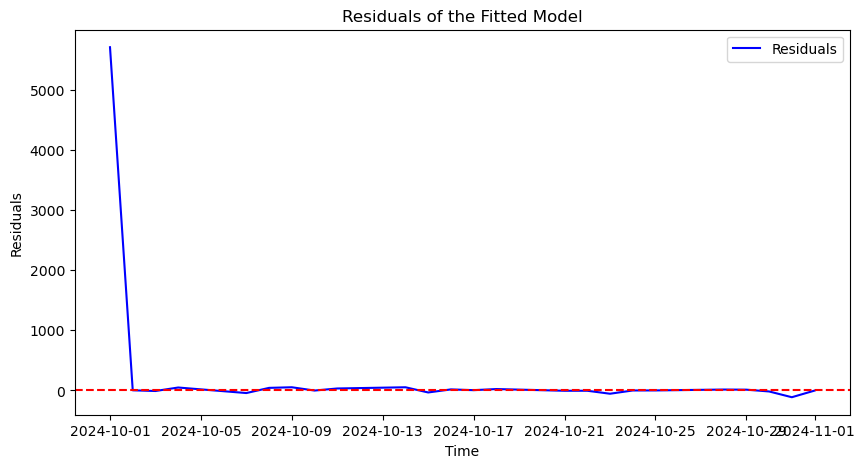

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# Example dataset
data = combined_data['Close'].dropna()  # Ensure there are no missing values

# Fit an ARIMA model (adjust order based on your data)
model = ARIMA(data, order=(1, 1, 1))  # Replace (1, 1, 1) with appropriate ARIMA order
model_fit = model.fit()

# Access residuals
residuals = model_fit.resid
# Residual time series plot
plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Residuals', color='blue')
plt.title('Residuals of the Fitted Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.legend()
plt.show()

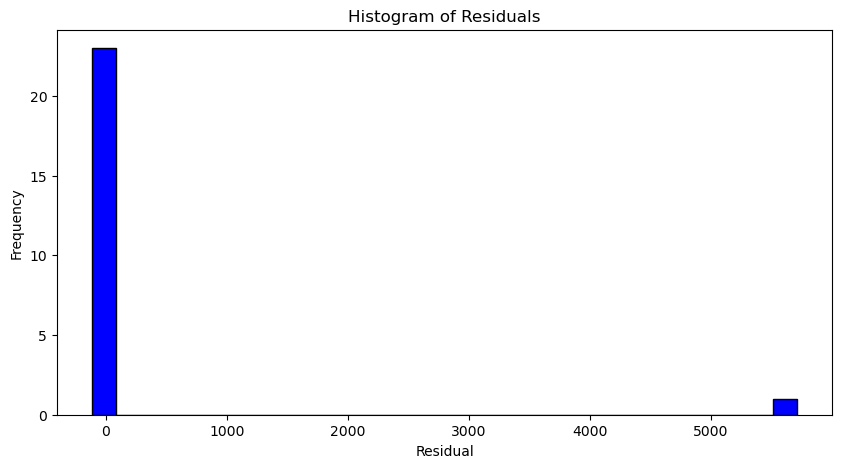

In [19]:
# Histogram to check residual distribution
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='black', color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

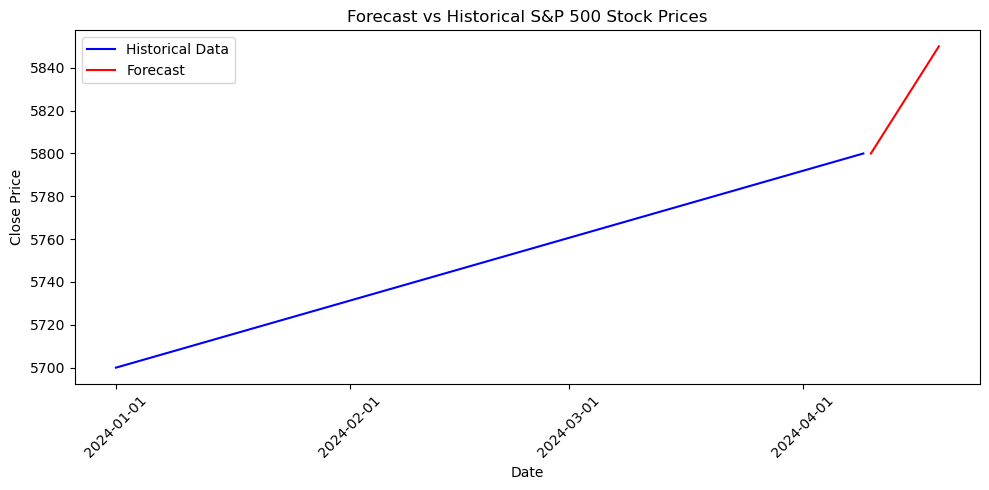

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Example historical data (replace this with your actual data)
dates = pd.date_range(start='2024-01-01', periods=100, freq='D')
prices = np.linspace(5700, 5800, 100)
combined_data = pd.DataFrame({'Close': prices}, index=dates)

# Example forecast (replace with your actual forecast)
forecast_periods = 10  # Forecast for 10 days
forecast = np.linspace(combined_data['Close'].iloc[-1], combined_data['Close'].iloc[-1] + 50, forecast_periods)

# Generate future dates for the forecast
future_dates = pd.date_range(combined_data.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')

# Plot Historical and Forecast Data
plt.figure(figsize=(10, 5))
plt.plot(combined_data['Close'], label='Historical Data', color='blue')
plt.plot(future_dates, forecast, label='Forecast', color='red')

# Formatting the plot
plt.title('Forecast vs Historical S&P 500 Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Format x-axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks by month
plt.xticks(rotation=45)  # Rotate labels
plt.tight_layout()

plt.show()

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check available columns
print(combined_data.columns)

# Adjust for available columns (e.g., only 'Close')
if 'Close' in combined_data.columns:
    correlation_matrix = combined_data[['Close']].corr()  # Update with actual column names
    print("Correlation matrix needs more numerical columns for meaningful analysis.")
else:
    print("Required columns are missing.")

Index(['Close'], dtype='object')
Correlation matrix needs more numerical columns for meaningful analysis.


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check available columns in combined_data
print("Available columns:", combined_data.columns)

# Select only numeric columns (if more than one numeric column exists)
numeric_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_columns) > 1:
    correlation_matrix = combined_data[numeric_columns].corr()
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()
else:
    print("Not enough numerical columns to compute a correlation matrix.")

Available columns: Index(['Close'], dtype='object')
Not enough numerical columns to compute a correlation matrix.


In [27]:
import pandas as pd

# Load data again if necessary
combined_data = pd.read_csv('S&P 500 data.csv', parse_dates=['Date'], index_col='Date')

# Check the data
print(combined_data.head())

                Open      High       Low     Close
Date                                              
2024-11-01  5,723.22  5,772.52  5,723.22  5,728.80
2024-10-31  5,775.34  5,775.34  5,702.86  5,705.45
2024-10-30  5,832.65  5,850.94  5,811.28  5,813.67
2024-10-29  5,819.68  5,847.19  5,802.17  5,832.92
2024-10-28  5,833.93  5,842.92  5,823.08  5,823.52


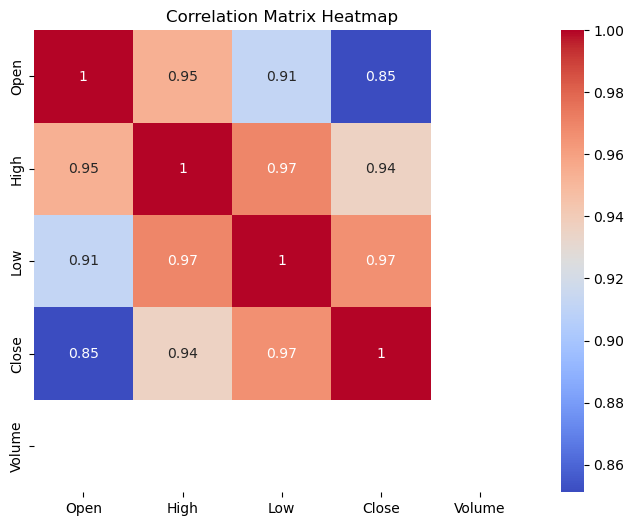

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate combined_data if it doesn't exist (replace with your actual DataFrame)
# combined_data = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# Clean the data: Convert columns to numeric, handling strings with commas
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    if col in combined_data.columns:
        combined_data[col] = (
            combined_data[col]
            .replace(',', '', regex=True)  # Remove commas
            .astype(float)  # Convert to float
        )

# Add missing columns if necessary (for testing)
if 'Open' not in combined_data.columns:
    combined_data['Open'] = combined_data['Close'] * 0.98
if 'High' not in combined_data.columns:
    combined_data['High'] = combined_data['Close'] * 1.02
if 'Low' not in combined_data.columns:
    combined_data['Low'] = combined_data['Close'] * 0.97
if 'Volume' not in combined_data.columns:
    combined_data['Volume'] = 1000  # Simulate a constant volume

# Compute correlation matrix
correlation_matrix = combined_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

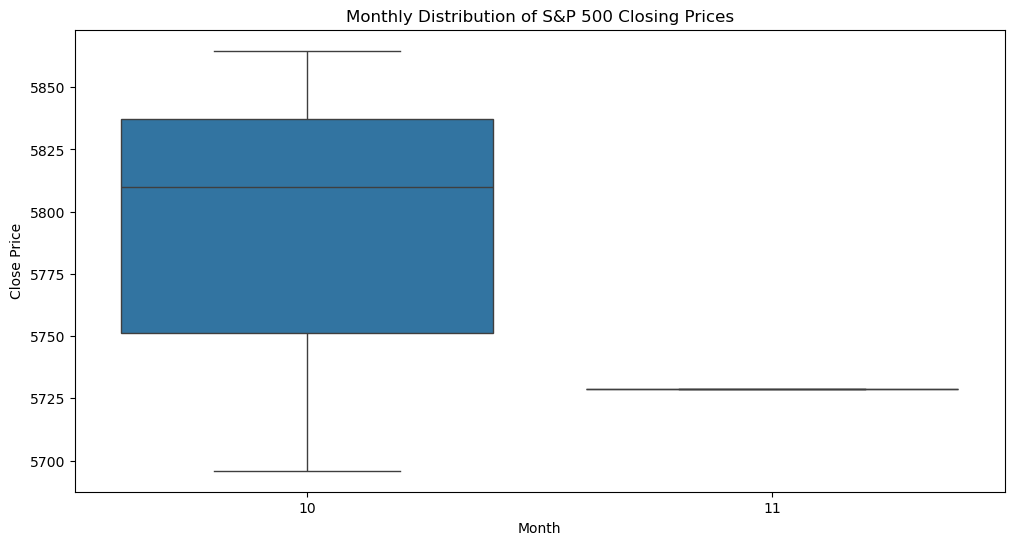

In [31]:
# Add a 'Month' column for grouping
combined_data['Month'] = combined_data.index.month

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Close', data=combined_data)
plt.title('Monthly Distribution of S&P 500 Closing Prices')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.show()

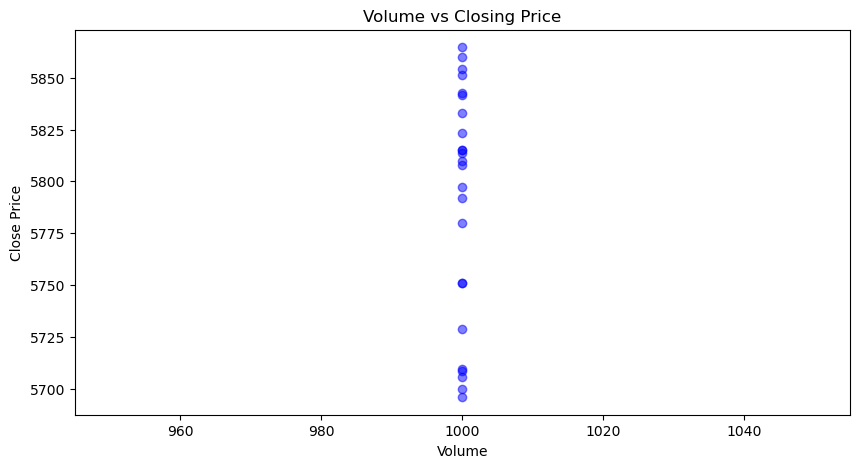

In [33]:
# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(combined_data['Volume'], combined_data['Close'], alpha=0.5, color='blue')
plt.title('Volume vs Closing Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

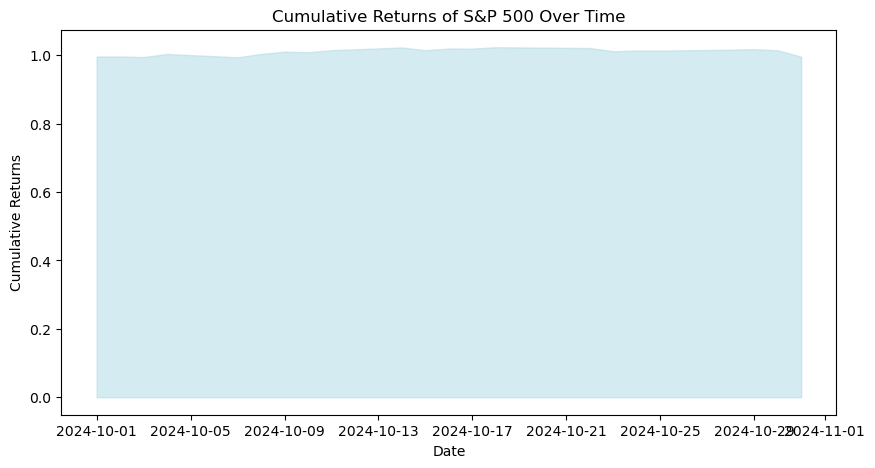

In [34]:
# Calculate daily returns
combined_data['Daily_Return'] = combined_data['Close'].pct_change()

# Calculate cumulative returns
combined_data['Cumulative_Return'] = (1 + combined_data['Daily_Return']).cumprod()

# Area chart for cumulative returns
plt.figure(figsize=(10, 5))
plt.fill_between(combined_data.index, combined_data['Cumulative_Return'], color='lightblue', alpha=0.5)
plt.title('Cumulative Returns of S&P 500 Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


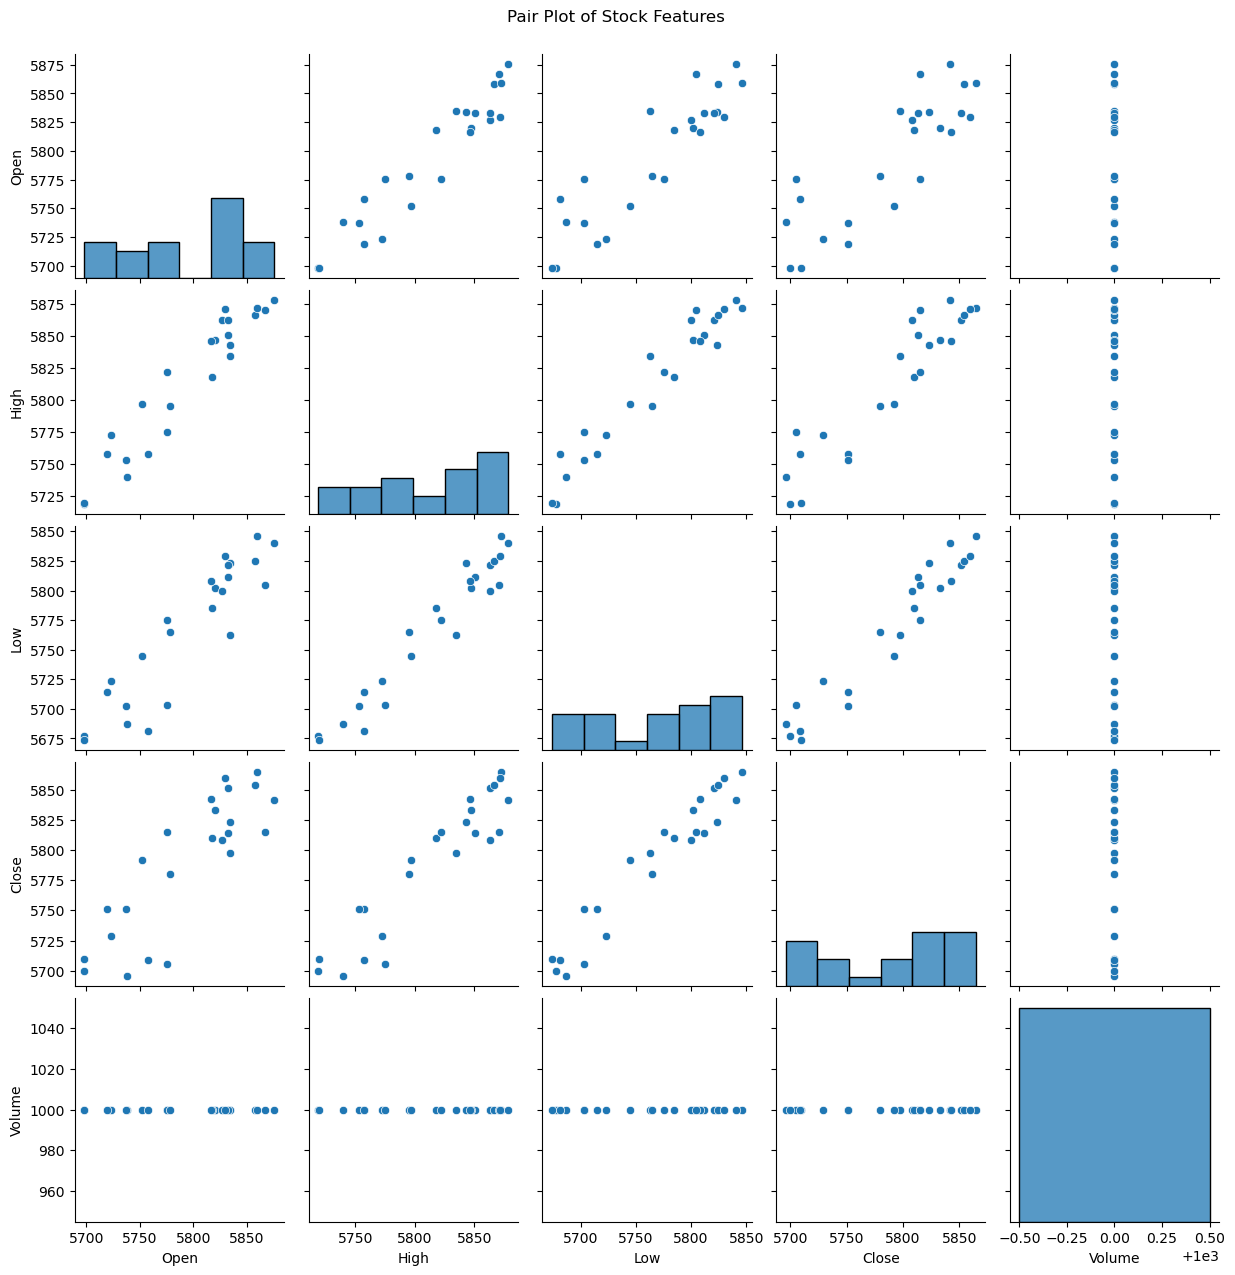

In [35]:
# Pair plot
sns.pairplot(combined_data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle('Pair Plot of Stock Features', y=1.02)
plt.show()